 # LENDING CLUB CASE STUDY

In [204]:
# Import All the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [205]:
# Read the given data file 
loan = pd.read_csv('loan.csv')

In [206]:
#Check Data Shape(rows and columns)
loan.shape

(39717, 111)

In [207]:
#Lets take a look at first 5 Rows of Data to get some initial understanding
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [208]:
#Check How many columns have null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [209]:
#From Above Step We find that many columns have all their values as null. 
#Since they will not be of any use, we may remove them from the data
loan.dropna(axis = 1, how = 'all', inplace = True)

In [210]:
#Now let re-check the shape of Data
loan.shape

(39717, 57)

In [211]:
#After throughly going through the data we observe that still some columns are not needed and 
#donot provide any useful information for the ANalysis

In [212]:
#Among which we observe few columns have only 1 value in all rows, lets remove these.
single_value_columns = loan.columns[loan.nunique() == 1]
single_value_columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [213]:
loan = loan.drop(columns=single_value_columns)

In [214]:
loan.shape

(39717, 48)

In [215]:
# Lets remove some more columns that donot provide any useful information for analysis. 
#All of these either provide  data after loan was given or are generic columns 
#which have no influence on loan defaulting

loan.drop(['emp_title', 'url', 'desc', 'zip_code', 'addr_state', 'recoveries','last_pymnt_amnt','next_pymnt_d','last_pymnt_amnt','total_rec_late_fee','total_rec_int','total_rec_prncp','collection_recovery_fee','mths_since_last_delinq','mths_since_last_record','member_id','id','delinq_2yrs','last_pymnt_d','title','last_credit_pull_d'], axis=1,inplace=True)

In [216]:
#Now lets see how many columns are left

loan.shape

(39717, 28)

In [217]:
#ALl the rows in which are current loans, will not be used as we can only use data of 
#loans which have either charged off or fully paid to predict
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [218]:
#Check for missing values
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
pub_rec_bankruptcies     697
dtype: int64

In [219]:
#check mode of employee length to replace
loan.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [220]:
#Safe to replace missing values as gap is large for mode and others
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [221]:
#Lets drop all rows of revol_util having null values as number is very less
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

In [222]:
# pub_rec_bankruptcies can be cleaned in similar way
print("Before ")
print(loan.pub_rec_bankruptcies.isnull().sum())
print("After ")
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

Before 
697
After 
0


In [223]:
# CHange emp_length column to number type and remove other signs(We assume  <1 as 1 and 10+ as 10 )

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan['emp_length']=pd.to_numeric(loan['emp_length'])
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
5       5000         5000           5000.0   36 months    7.90%       156.46   

  grade sub_grade  emp_length home_ownership  ...  open_acc pub_rec revol_bal  \
0     B        B2          10           RENT  ...         3       0     13648   
1     C        C4           1           RENT  ...         3       0      1687   
2     C        C5          10           RENT  ...         2       0      2956   
3     C        C1          10           RENT  ...        10       0      5598   
5     A        A4           3           RENT  ...         9       0      7963   

  revol_util total_acc  out_prncp out_prncp_inv   total_pymnt  \
0     83.70%         9        0.0           0.0   5863.155187   
1      9.40%         4        0.0           0.0   1008.710000   
2     98.50%        10        0.0           0.0   3005.666844   
3        21%        37        0.0           0.0  12231.890000   
5     28.30%        12        0.0           0.0   5632.210000   

   total_pymnt_inv  pub_rec_bankruptcies  
0          5833.84                   0.0  
1          1008.71                   0.0  
2          3005.67                   0.0  
3         12231.89                   0.0  
5          5632.21                   0.0  

[5 rows x 28 columns]

In [224]:

# Remove % symbol from intrest rate and revol column for calculations
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [225]:
# convert amount columns into numeric data to find some correlation among important ones.

num_columns = ['loan_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[num_columns] = loan[num_columns].apply(pd.to_numeric)

In [226]:

# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(3)

# Observations
# Two new columns month and year were derived from issue date

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   

  grade sub_grade  emp_length home_ownership  ...  revol_bal revol_util  \
0     B        B2          10           RENT  ...      13648      83.70   
1     C        C4           1           RENT  ...       1687       9.40   
2     C        C5          10           RENT  ...       2956      98.50   

  total_acc out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0         9       0.0           0.0  5863.155187         5833.84   
1         4       0.0           0.0  1008.710000         1008.71   
2        10       0.0           0.0  3005.666844         3005.67   

   pub_rec_bankruptcies  year  month  
0                   0.0  2011     12  
1                   0.0  2011     12  
2                   0.0  2011     12  

[3 rows x 30 columns]

In [227]:
# Basic statistics with .describe() 
loan['loan_amnt'].describe()

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

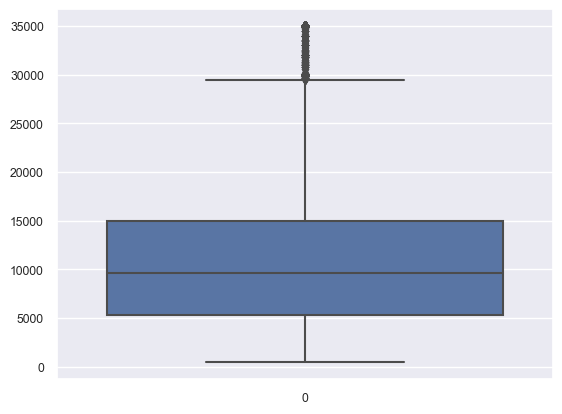

In [228]:
sns.boxplot(loan.loan_amnt)

In [229]:
# Basic statistics with .describe() -Quantitative Variables
loan.total_pymnt.describe()

count    38527.000000
mean     11876.606662
std       8810.442949
min          0.000000
25%       5519.447680
50%       9685.515720
75%      16147.246055
max      58563.679930
Name: total_pymnt, dtype: float64

<Axes: >

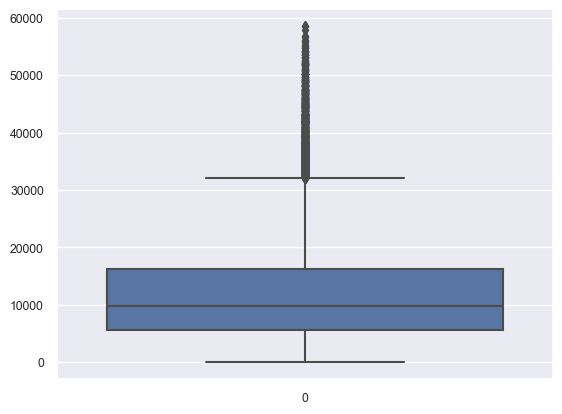

In [230]:
sns.boxplot(loan.total_pymnt)

In [231]:
print(loan['annual_inc'].describe())

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<Axes: >

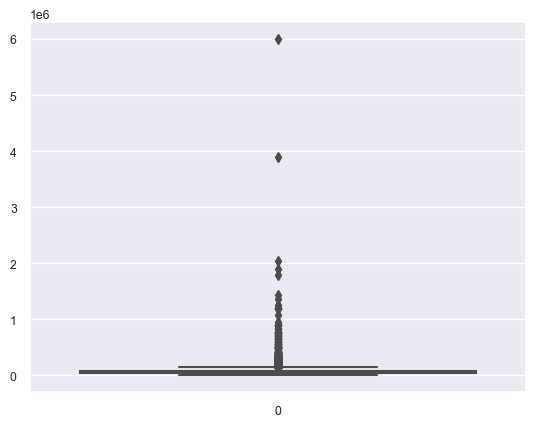

In [232]:
sns.boxplot(loan.annual_inc)

In [233]:
#Annual Income looks like it has some outliers, lets remove those
q_95 = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= q_95]

<Axes: >

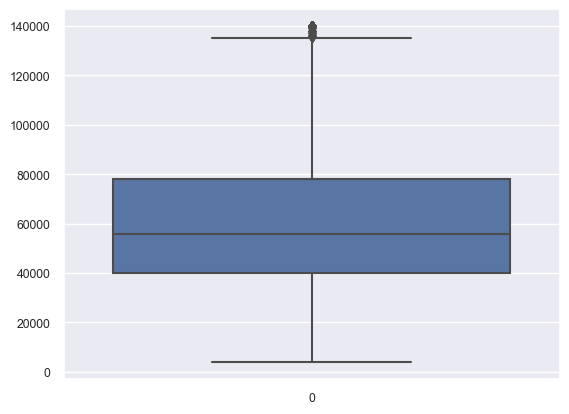

In [234]:
sns.boxplot(loan.annual_inc)

In [235]:
loan['int_rate'].describe()

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

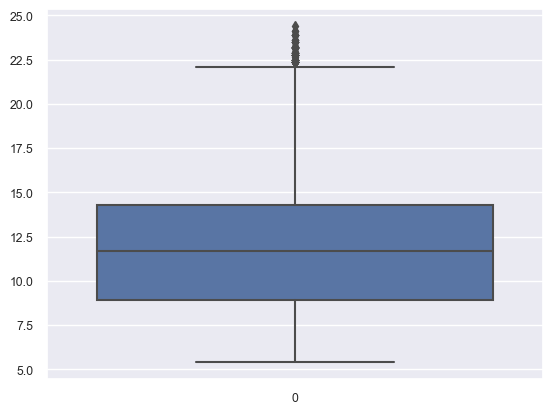

In [236]:
sns.boxplot(loan.int_rate)

In [237]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_numeric = loan.select_dtypes(include=['int64', 'float64']).fillna(0)

In [238]:
loan_correlation = loan_numeric.corr()
non_finite_mask=~np.isfinite(loan_correlation)
loan_correlation = loan_correlation.fillna(0)

In [239]:
sns.set(font_scale=0.8)

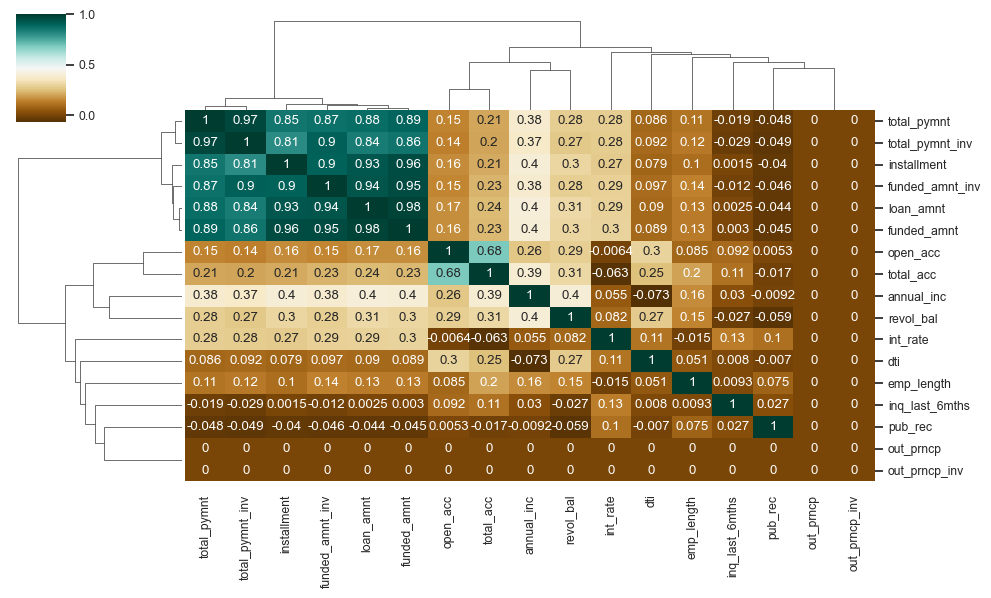

In [240]:
sns.clustermap(loan_correlation, annot=True, figsize=(10, 6), cmap="BrBG")
plt.show()

In [241]:
#Inference
#There is a high correlation between the loan amount, investor amount, and funded amount.
#Annual income and the debt-to-income (DTI) ratio exhibit a negative correlation.
#The DTI ratio represents the proportion of a borrower's monthly gross income allocated to debt payments. Therefore, a lower annual income corresponds to a higher DTI ratio, and vice versa.
#Annual income and years of employment show a positive correlation.
#This indicates that as work experience increases, so does income.

In [242]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_catagory'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_catagory'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_catagory'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_catagory'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [243]:
# Lets take a look on shape and data
print(loan.shape)
loan.head(1)

(36606, 34)


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   

  grade sub_grade  emp_length home_ownership  ...  out_prncp_inv  total_pymnt  \
0     B        B2          10           RENT  ...            0.0  5863.155187   

  total_pymnt_inv pub_rec_bankruptcies  year  month loan_amnt_catagory  \
0         5833.84                  0.0  2011     12             0-7000   

   annual_inc_catagory  int_rate_catagory  dti_catagory  
0          20000-40000              10-13           NaN  

[1 rows x 34 columns]

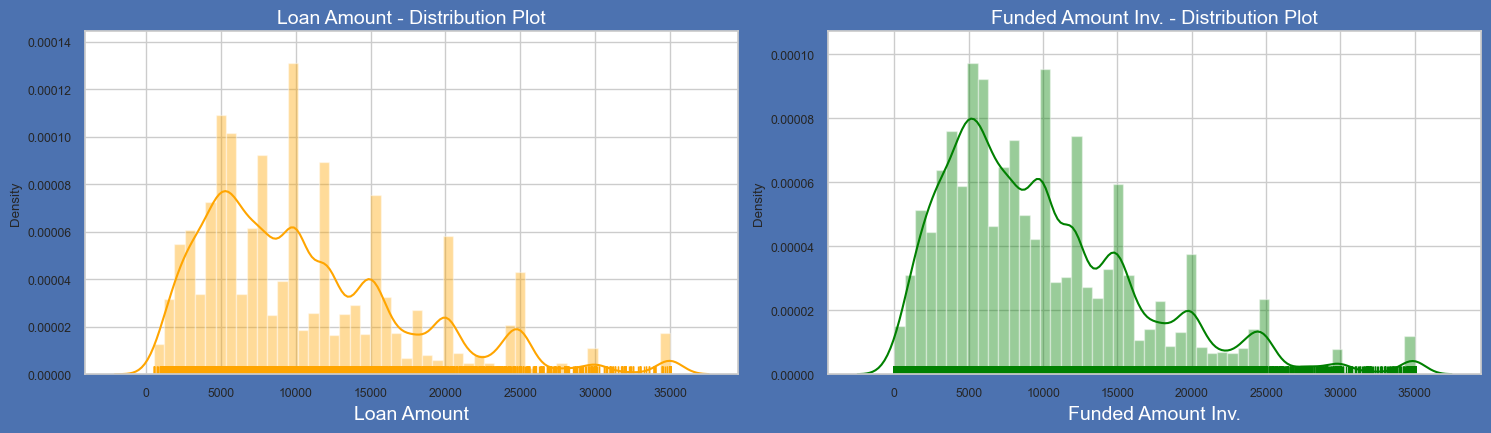

In [244]:
# Lets see distribution of three loan amount fields using distribution plot.

plt.figure(figsize=(15, 8), facecolor='b')
sns.set_style("whitegrid") 

plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'], rug=True, color='orange') 
ax.set_title('Loan Amount - Distribution Plot', fontsize=14, color='w')
ax.set_xlabel('Loan Amount', fontsize=14, color='w')

plt.subplot(2, 2, 2)
ax = sns.distplot(loan['funded_amnt_inv'], rug=True, color='green') 
ax.set_title('Funded Amount Inv. - Distribution Plot', fontsize=14, color='w')
ax.set_xlabel('Funded Amount Inv.', fontsize=14, color='w')

plt.tight_layout()  
plt.show()

# Inference: 
# Distribution is almost the same in both cases, but lets use loan_amount as its actual amount given

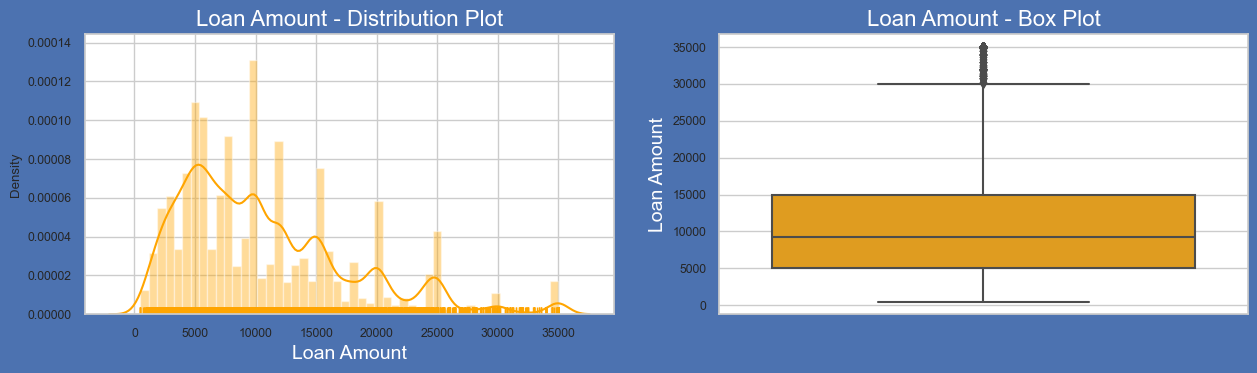

In [245]:
# Univariate Analysis on Loan amount

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("whitegrid")

plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True,color='orange')
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'],color='orange')
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

#Inference
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

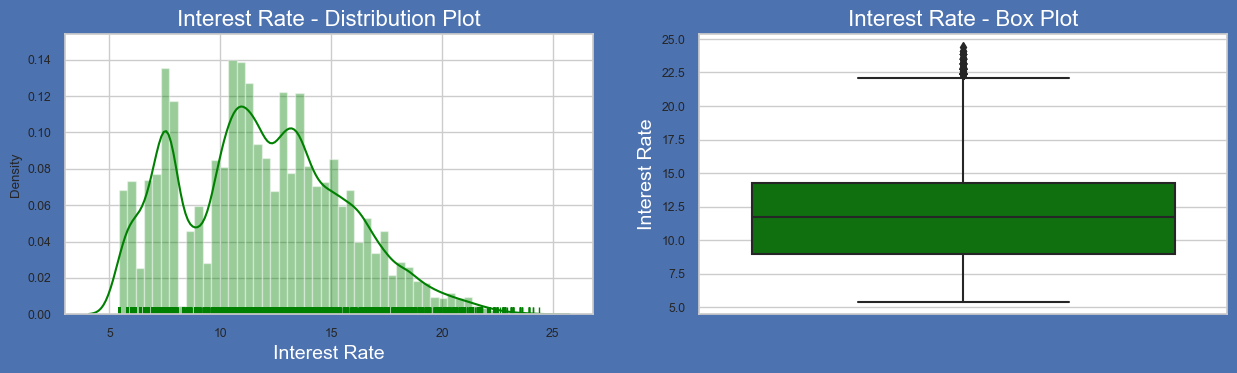

In [246]:
# Univariate Analysis on Intrest Rate

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True,color='green')
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'],color='green')
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Inference :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

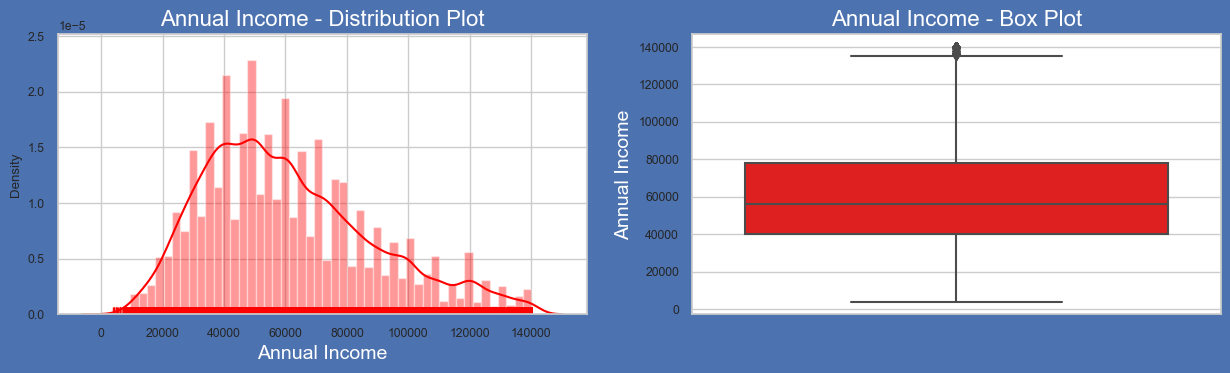

In [247]:
# Univariate Analysis on Annual Income 

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True,color='red')
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'],color='red')
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Inference :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

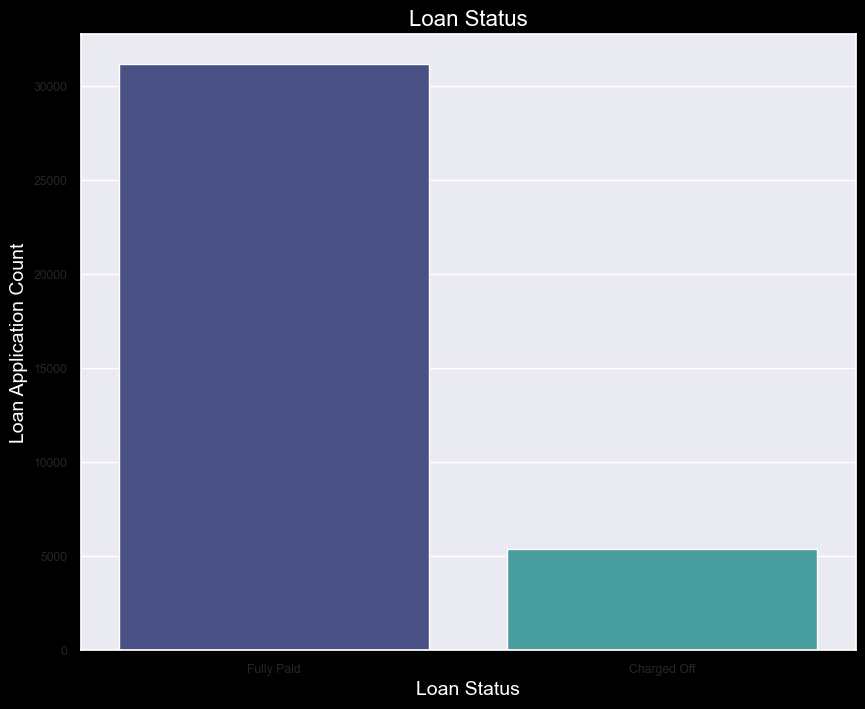

In [283]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10, 8), facecolor='black')
sns.set_style("darkgrid")

ax = sns.countplot(x="loan_status", data=loan, palette='mako')
ax.set_title('Loan Status', fontsize=16, color='white')
ax.set_xlabel('Loan Status', fontsize=14, color='white')
ax.set_ylabel('Loan Application Count', fontsize=14, color='white')

plt.show()

# Inference :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

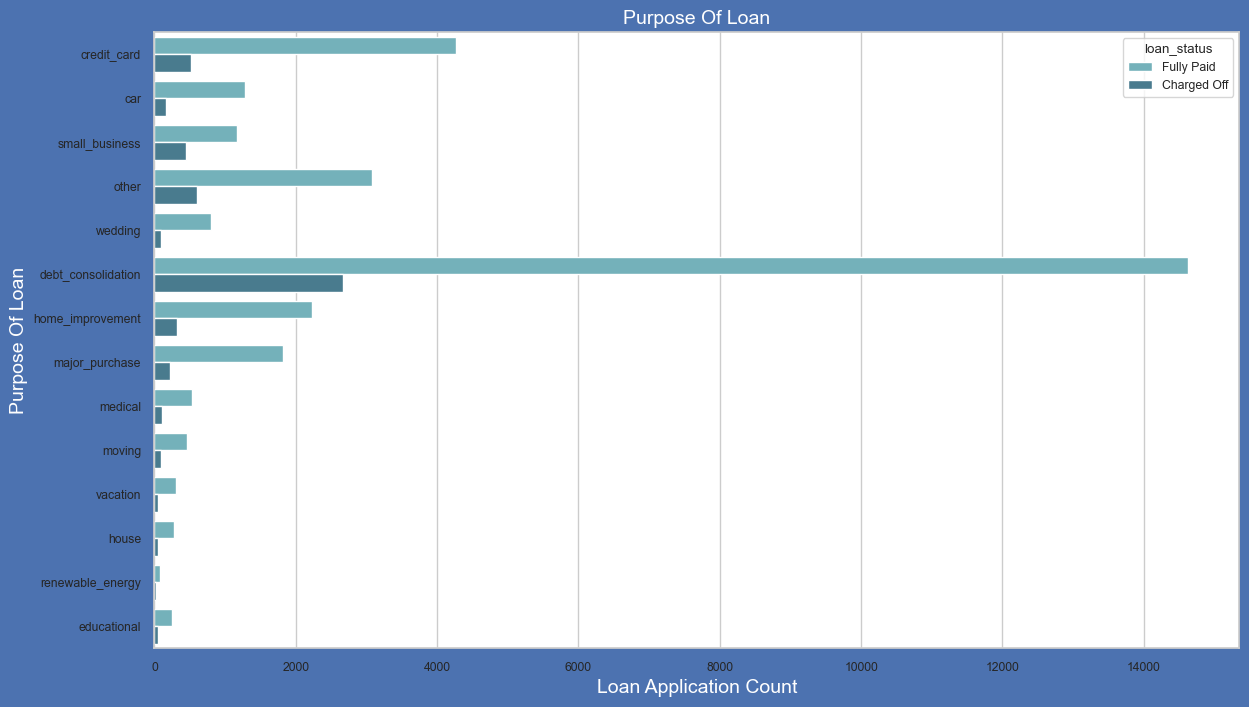

In [250]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("whitegrid")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Inference :
#The visualization indicates that a significant portion of the loans were acquired with the intention of consolidating debts 
#and settling credit card balances. Notably, there's a considerable frequency of charged-off instances associated with 
#these specific loan purposes.

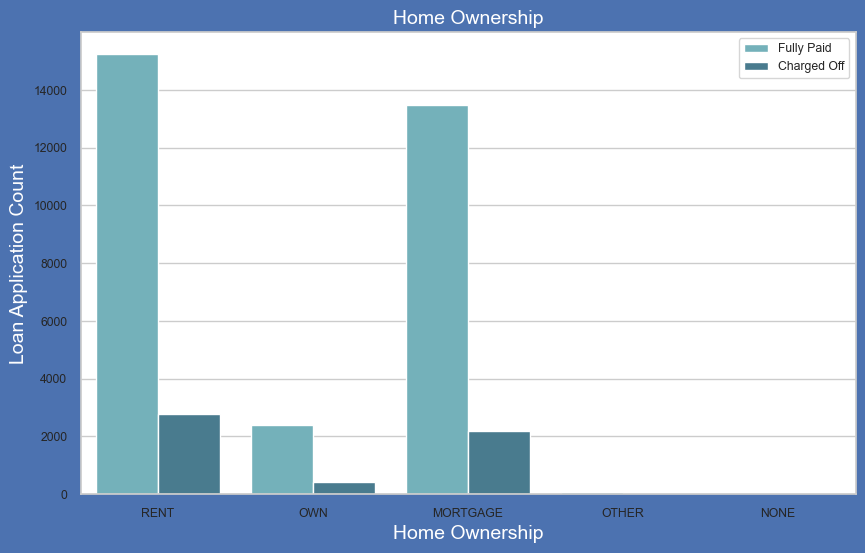

In [251]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

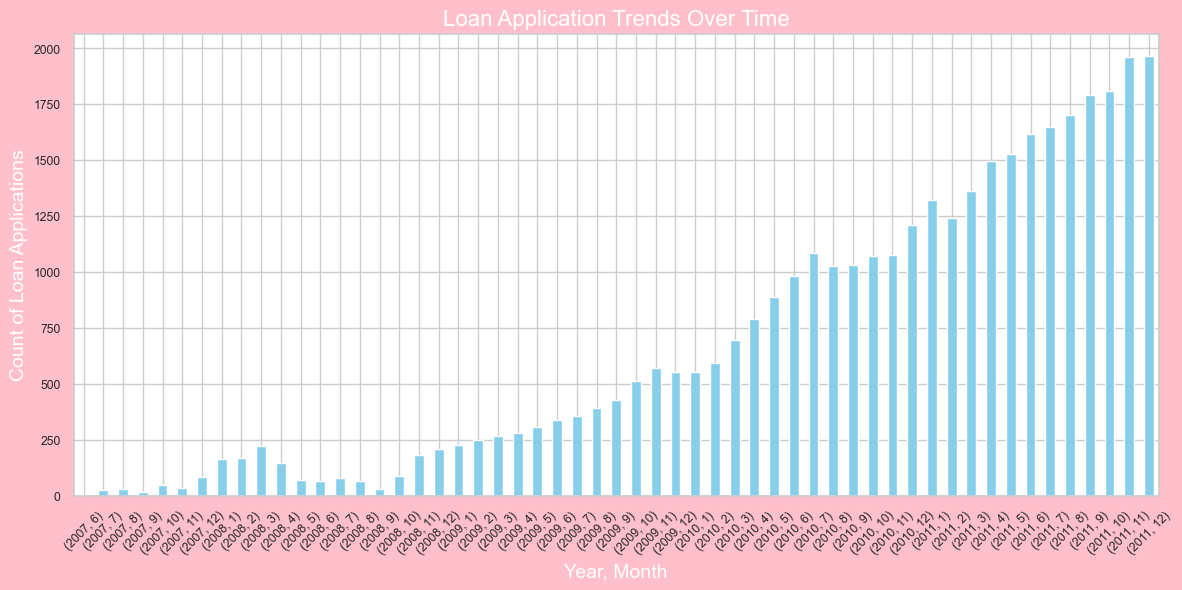

In [252]:
# Derived Column - Ordered Categorical Variables
#Let's delve into the frequency of approved loans over each year and month by 
#examining a derived column named "year" to uncover any discernible patterns in loan issuance trends.
plt.figure(figsize=(14, 6), facecolor='pink')  # Adjusted figsize and facecolor
loan.groupby(['year', 'month']).size().plot(kind='bar', color='skyblue')  # Changed to size() to count the occurrences
plt.ylabel('Count of Loan Applications', fontsize=14, color='white')  # Adjusted ylabel fontsize and color
plt.xlabel('Year, Month', fontsize=14, color='white')  # Adjusted xlabel fontsize and color
plt.title("Loan Application Trends Over Time", fontsize=16, color='white')  # Adjusted title fontsize and color
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


#Observation reveals a consistent upward trend in loan application numbers over successive years, 
#contributing to a higher occurrence of charged-off instances. 
#Notably, there was a noticeable decline in loan issuances during 2008 (May-October), 
#potentially attributed to the economic recession.

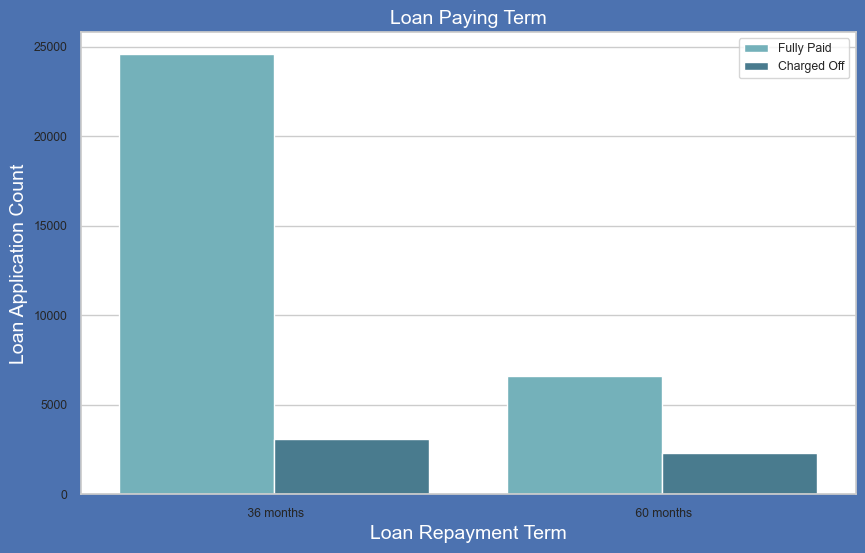

In [253]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Inference :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

In [254]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_catagory', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
# Income range 80000+  has less chances of charged off.
# Income range 20000-60000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status annual_inc_catagory  Charged Off  Fully Paid  Total  \
0                       0-20000          233         933   1166   
1                   20000-40000         1507        6991   8498   
2                   40000-60000         1725        9528  11253   
3                   60000-80000         1023        6596   7619   
4                       80000 +          914        7156   8070   

loan_status  Chargedoff_Proportion  
0                         0.199828  
1                         0.177336  
2                         0.153292  
3                         0.134270  
4                         0.113259

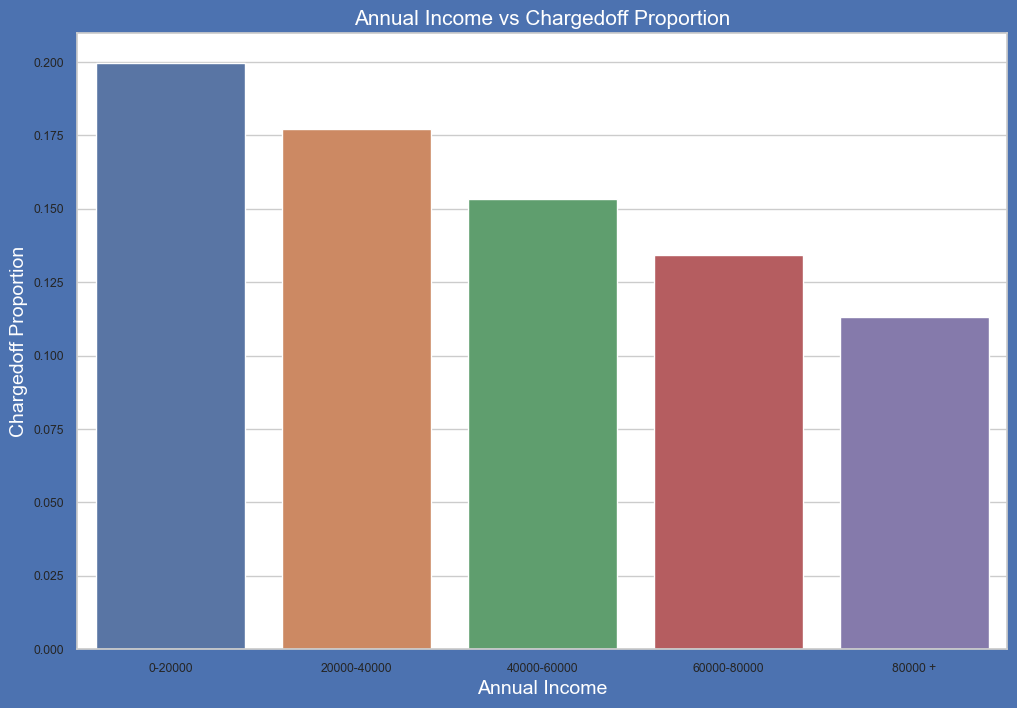

In [255]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_catagory', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Inference:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [256]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
#Small business loan applicants exhibit a higher likelihood of loans being charged off.
#Loans for weddings have a comparatively lower proportion of charged-off instances compared to other categories.

loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          454        1168   1622   
10             renewable_energy           18          77     95   
3                   educational           54         255    309   
8                        moving           90         458    548   
9                         other          601        3085   3686   
5                         house           55         283    338   
7                       medical          103         536    639   
2            debt_consolidation         2672       14621  17293   
12                     vacation           52         312    364   
4              home_improvement          319        2232   2551   
0                           car          158        1288   1446   
1                   credit_card          518        4264   4782   
6                major_purchase          216        1825   2041   
13                      wedding           92         800    892   

loan_status  Chargedoff_Proportion  
11                        0.279901  
10                        0.189474  
3                         0.174757  
8                         0.164234  
9                         0.163049  
5                         0.162722  
7                         0.161189  
2                         0.154513  
12                        0.142857  
4                         0.125049  
0                         0.109267  
1                         0.108323  
6                         0.105830  
13                        0.103139

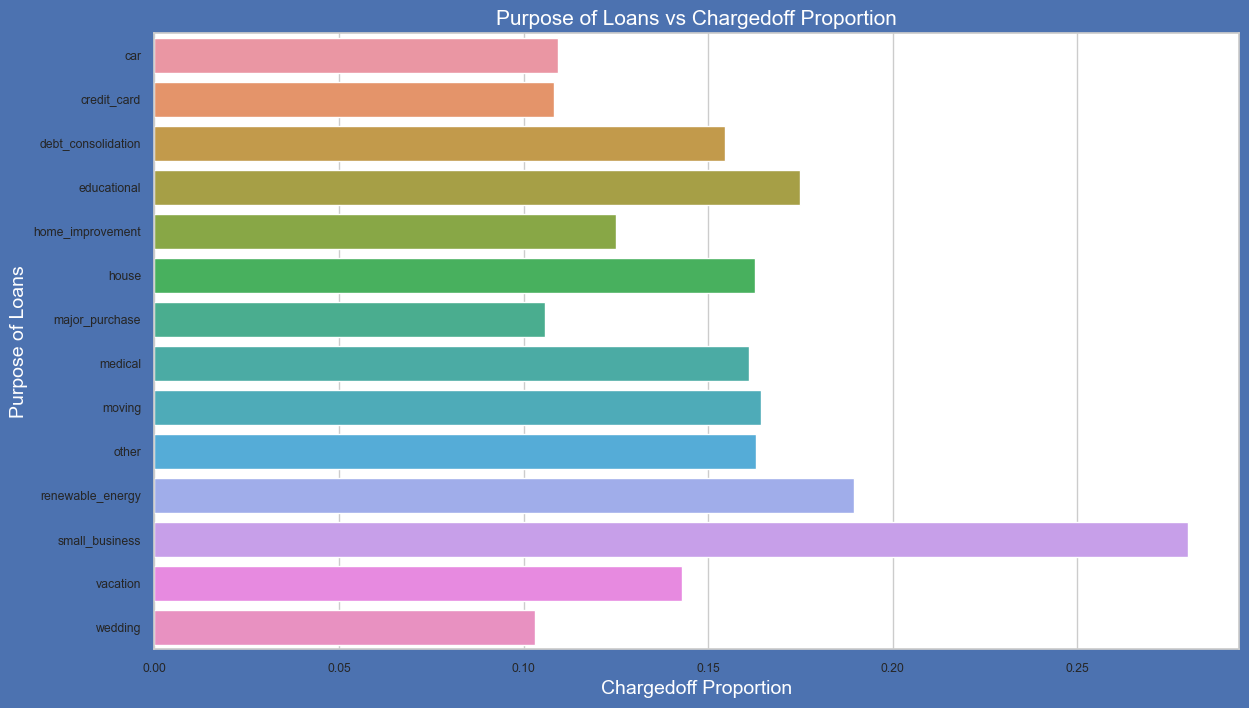

In [257]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# Wedding where chanrged off proportion is better as compare to other categories.

In [258]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
#Loans with a Grade "A" have a very low probability of being charged off.
#Loans with Grades "G" and "F" exhibit a very high likelihood of being charged off.
#The likelihood of a loan being charged off increases progressively as the grade moves from "A" towards "G".

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
6               G           93         166    259               0.359073
5               F          286         595    881               0.324631
4               E          656        1781   2437               0.269183
3               D         1077        3743   4820               0.223444
2               C         1321        6146   7467               0.176912
1               B         1376        9720  11096               0.124009
0               A          593        9053   9646               0.061476

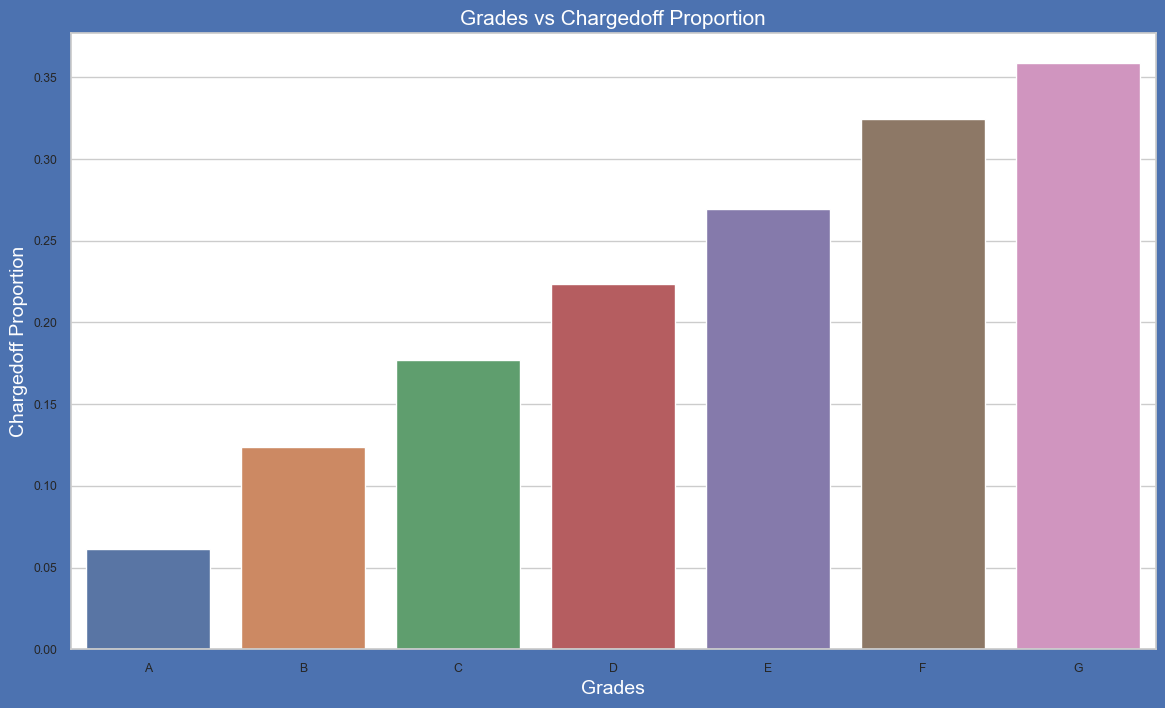

In [259]:
# Lets draw bar plots on data calculated 

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Inference:
#Loans with a Grade "A" have a very low probability of being charged off.
#Loans with Grades "G" and "F" exhibit a very high likelihood of being charged off.
#The likelihood of a loan being charged off increases progressively as the grade moves from "A" towards "G".

In [260]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
#Loans with subgrades within the "A" category display a significantly lower probability of being charged off.
#Conversely, loans categorized under subgrades of "G" and "F" demonstrate a notably higher likelihood of being charged off.
#There is a discernible trend where the proportion of charged-off instances increases progressively as subgrades transition 
#from those within the "A" category towards those within the "G" category.One exception being F5

loan_status sub_grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
29                 F5           50          48     98               0.510204
32                 G3           19          21     40               0.475000
34                 G5            9          13     22               0.409091
31                 G2           25          40     65               0.384615
30                 G1           29          58     87               0.333333
28                 F4           45          92    137               0.328467
26                 F2           65         150    215               0.302326
23                 E4          117         275    392               0.298469
27                 F3           46         110    156               0.294872
25                 F1           80         195    275               0.290909
24                 E5           98         242    340               0.288235
20                 E1          185         490    675               0.274074
21                 E2          147         415    562               0.261566
19                 D5          200         587    787               0.254130
33                 G4           11          34     45               0.244444
18                 D4          209         660    869               0.240506
22                 E3          109         359    468               0.232906
17                 D3          245         816   1061               0.230914
16                 D2          263         957   1220               0.215574
12                 C3          267        1150   1417               0.188426
14                 C5          204         888   1092               0.186813
15                 D1          160         723    883               0.181200
13                 C4          209         945   1154               0.181109
11                 C2          313        1529   1842               0.169924
10                 C1          328        1634   1962               0.167176
9                  B5          348        2144   2492               0.139647
8                  B4          319        2014   2333               0.136734
7                  B3          326        2328   2654               0.122833
6                  B2          217        1682   1899               0.114271
5                  B1          166        1552   1718               0.096624
4                  A5          213        2386   2599               0.081955
3                  A4          173        2576   2749               0.062932
2                  A3          103        1646   1749               0.058891
1                  A2           74        1377   1451               0.050999
0                  A1           30        1068   1098               0.027322

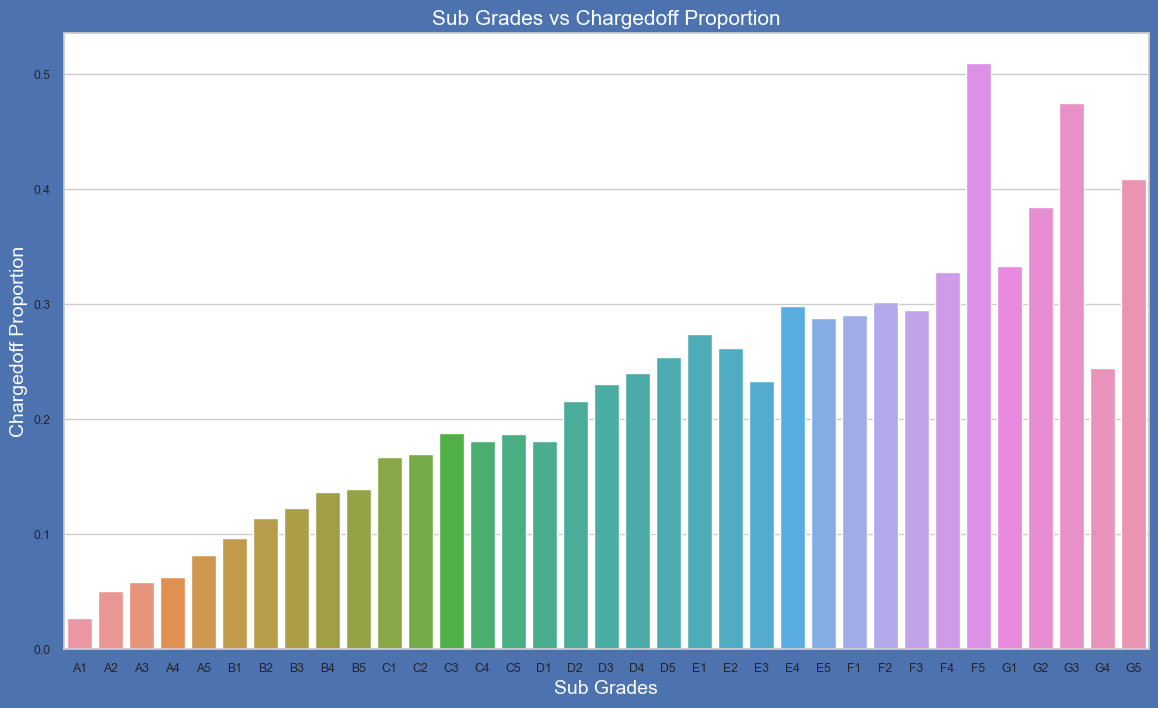

In [261]:
# Draw bar plots on data calculated above. 

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Inference:
#Loans with subgrades within the "A" category display a significantly lower probability of being charged off.
#Conversely, loans categorized under subgrades of "G" and "F" demonstrate a notably higher likelihood of being charged off.
#There is a discernible trend where the proportion of charged-off instances increases progressively as subgrades transition 
#from those within the "A" category towards those within the "G" category.One exception being F5

In [262]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan.groupby(['int_rate_catagory', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status int_rate_catagory  Charged Off  Fully Paid  Total  \
3                        16 +         1186        3123   4309   
2                     12.5-16         1945        8958  10903   
1                       10-13         1193        7707   8900   
0                        0-10          812       11012  11824   

loan_status  Chargedoff_Proportion  
3                         0.275238  
2                         0.178391  
1                         0.134045  
0                         0.068674

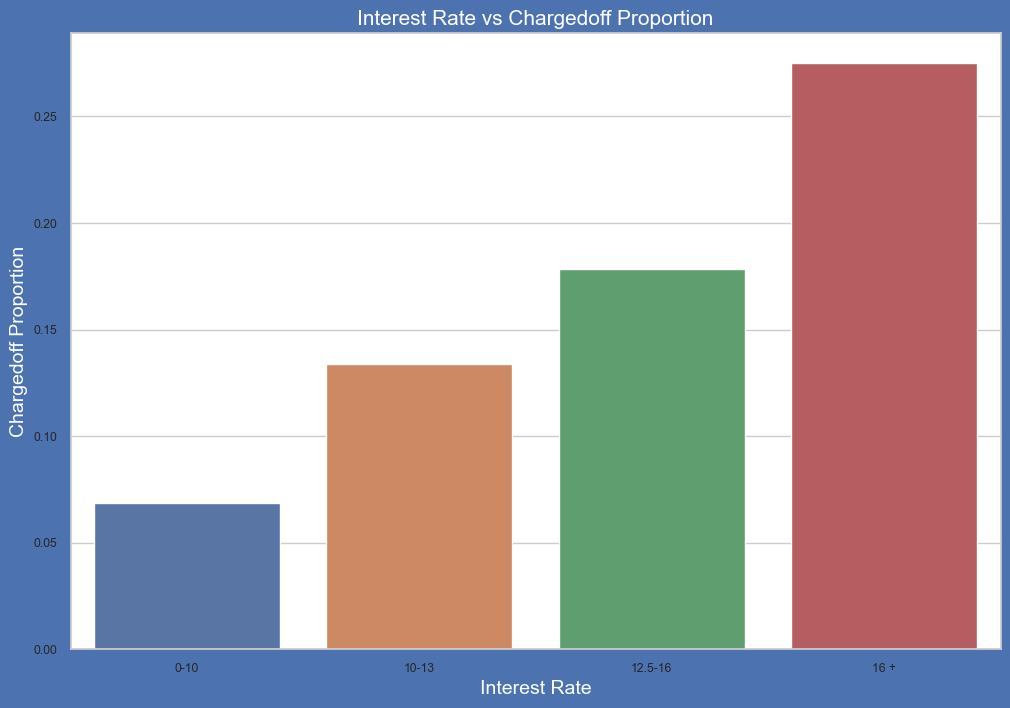

In [263]:
# Draww some bar plots on data calculated above. 

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_catagory', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Inference:
#Loans with an interest rate lower than 10% demonstrate a notably lower likelihood of being charged off. 
#It's worth noting that interest rates start from a minimum of 5%.
#Conversely, loans with an interest rate exceeding 16% exhibit a higher probability of being charged off compared to other interest rate categories.
#There's a discernible pattern where the proportion of charged-off instances tends to increase with higher interest rates.

In [264]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off']  + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
#Individuals who are either unemployed or possess less than one year of work experience tend to have a significantly higher
#probability of experiencing loan charge-offs.
#This correlation is logical as individuals with limited or no work experience typically lack a stable income source to repay 
#their loans.
#In contrast, the likelihood of loan charge-offs among applicants with more substantial work experience remains 
#relatively consistent, indicating that employment history plays a crucial role in loan repayment reliability.

loan_status  emp_length  Charged Off  Fully Paid  Total  Chargedoff_Proportion
9                    10         1493        7405   8898               0.167791
6                     7          252        1389   1641               0.153565
4                     5          440        2600   3040               0.144737
0                     1         1059        6293   7352               0.144042
7                     8          193        1149   1342               0.143815
5                     6          292        1778   2070               0.141063
2                     3          536        3284   3820               0.140314
3                     4          441        2753   3194               0.138071
1                     2          546        3550   4096               0.133301
8                     9          150        1003   1153               0.130095

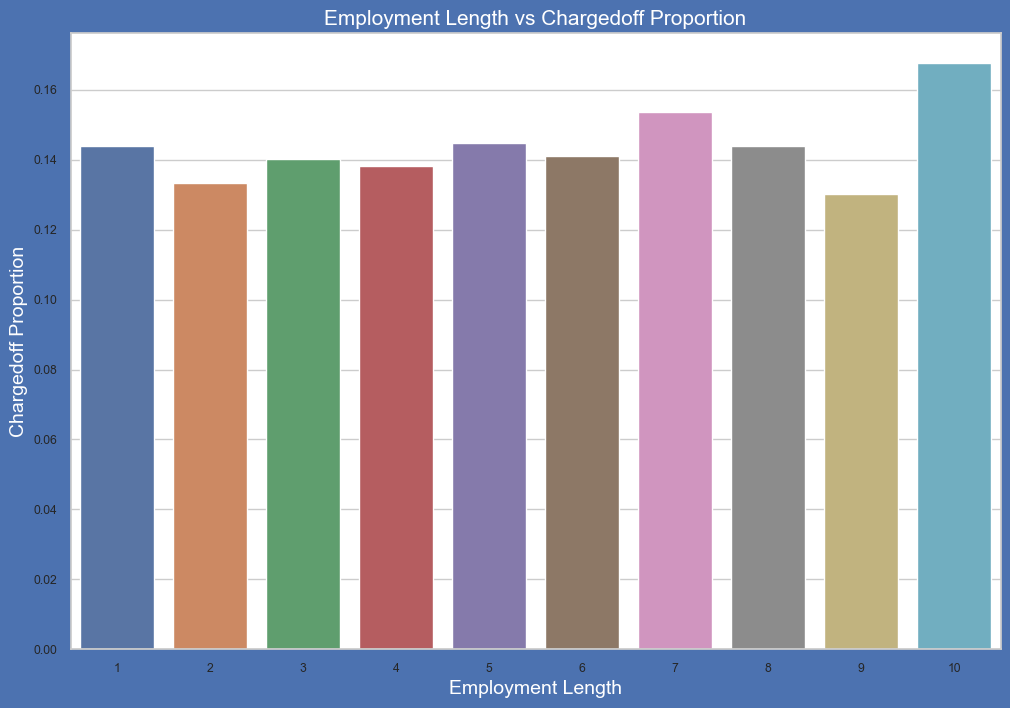

In [265]:
# Draw bar plots on data calculated above. 

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

#Inference
#Individuals who are either unemployed or possess less than one year of work experience demonstrate a notably elevated 
#likelihood of experiencing loan charge-offs.
#This pattern is logical since individuals with limited or no work experience often lack a reliable income source to fulfill 
#their loan obligations.
#Conversely, the likelihood of loan charge-offs among applicants with more extensive work experience appears to be relatively 
#consistent, suggesting that employment history plays a pivotal role in loan repayment reliability.

In [266]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
# There is not much difference in charged off proportion.
# We donot find any observation

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1943        9266  11209   
1               Source Verified         1370        7774   9144   
0                  Not Verified         2089       14164  16253   

loan_status  Chargedoff_Proportion  
2                         0.173343  
1                         0.149825  
0                         0.128530

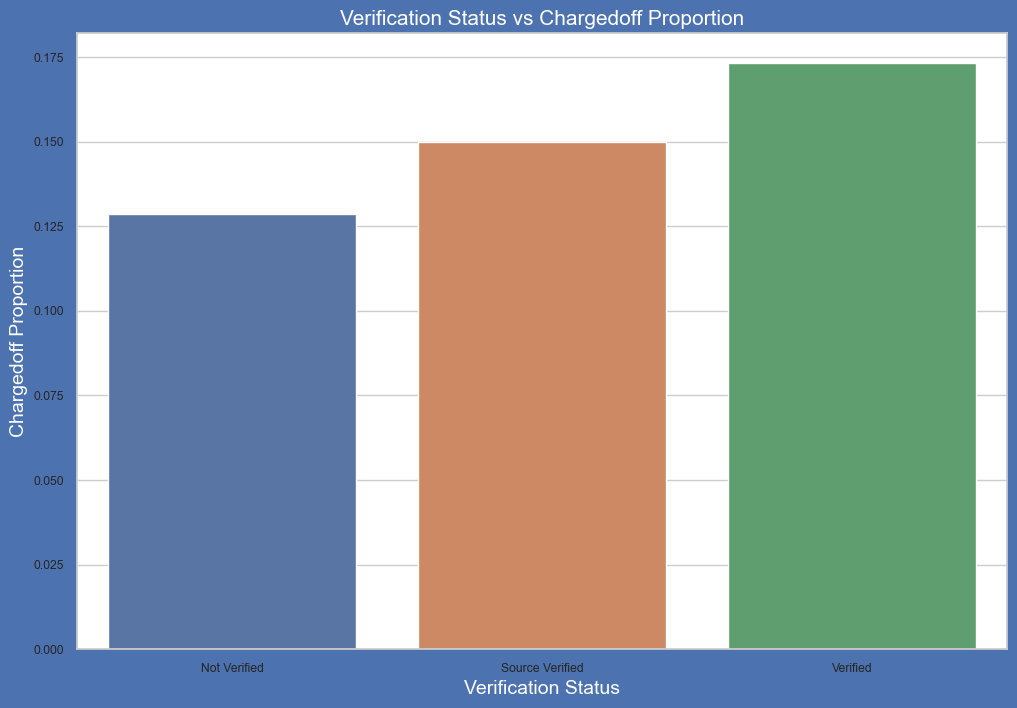

In [267]:
# Lets draw bar plots on data calculated above.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Inference:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [268]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
#Individuals with a "pub_rec_bankruptcies" value of 1 exhibit a higher proportion of charged-off instances compared to those 
#with no bankruptcies on record.
#Furthermore, applicants with a "pub_rec_bankruptcies" count of 2 display an even higher proportion of charged-off instances, 
#although the sample size for these cases may not be substantial enough to draw definitive conclusions.

loan_status pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                            2.0            2           3      5   
1                            1.0          361        1237   1598   
3                      Not Known          112         546    658   
0                            0.0         4927       29418  34345   

loan_status  Chargedoff_Proportion  
2                         0.400000  
1                         0.225907  
3                         0.170213  
0                         0.143456

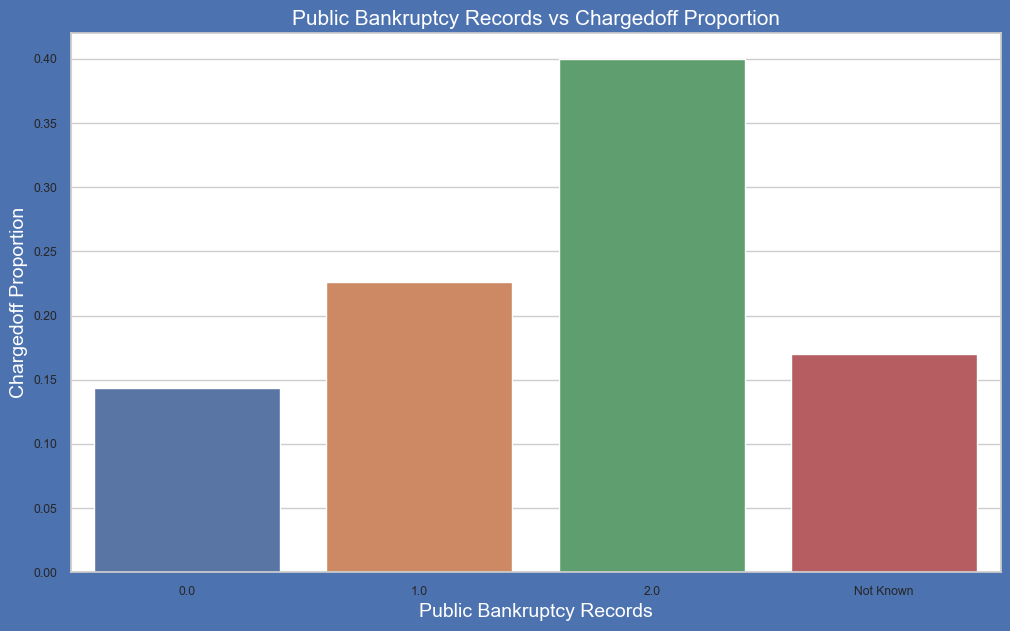

In [269]:
# Draw bar plots on data calculated above. 

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Inference:
#Individuals with a "pub_rec_bankruptcies" value of 1 demonstrate a higher proportion of charged-off instances compared to 
#those with no bankruptcies on record.
#Additionally, applicants with a "pub_rec_bankruptcies" count of 2 exhibit an even higher proportion of charged-off instances.
#However, due to the limited sample size, these numbers may not be statistically significant for decision-making.
#The "Not known" category represents instances where we lack information about the borrower. This absence of data aligns 
#logically with the concept that individuals who have defaulted previously are more likely to default again in the future.

In [270]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Inference:
#Individuals with a "pub_rec" value of 1 or 2 tend to exhibit a higher likelihood of loan charge-offs compared to those with 
#no Derogatory Public Records. These records, including public records and collections, are considered derogatory items by 
#lenders as they signify financial obligations that were not met as agreed upon. However, it's important to note that for 
#"pub_rec" counts of 3-4, the sample size is limited, making it difficult to draw definitive conclusions regarding charged-off
#probabilities.

loan_status  pub_rec  Charged Off  Fully Paid    Total  Chargedoff_Proportion
1                  1        449.0      1514.0   1963.0               0.228732
2                  2         10.0        36.0     46.0               0.217391
0                  0       4943.0     29646.0  34589.0               0.142907
3                  3          0.0         6.0      6.0               0.000000
4                  4          0.0         2.0      2.0               0.000000

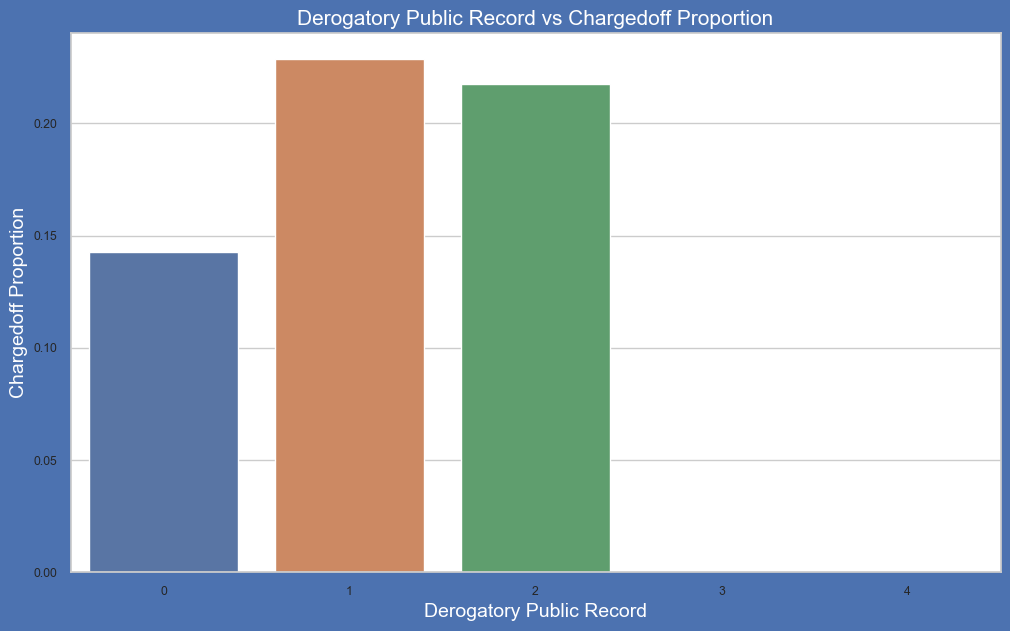

In [271]:
# Draw bar plots on data calculated above. 

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Inference:
# derogatory item is an entry that may be viewed negatively by lenders as it indicates risk and can impair your ability to 
#qualify for credit or other services. Public records and collections are considered derogatory items because they reflect 
#financial obligations that were not paid as agreed.

#Individuals with a "pub_rec" value of 1 or 2 have a higher likelihood of experiencing loan charge-offs compared to those with 
#no Derogatory Public Records.
#For "pub_rec" counts of 3-4, the sample size is too small to draw any reliable conclusions regarding charge-off probabilities.

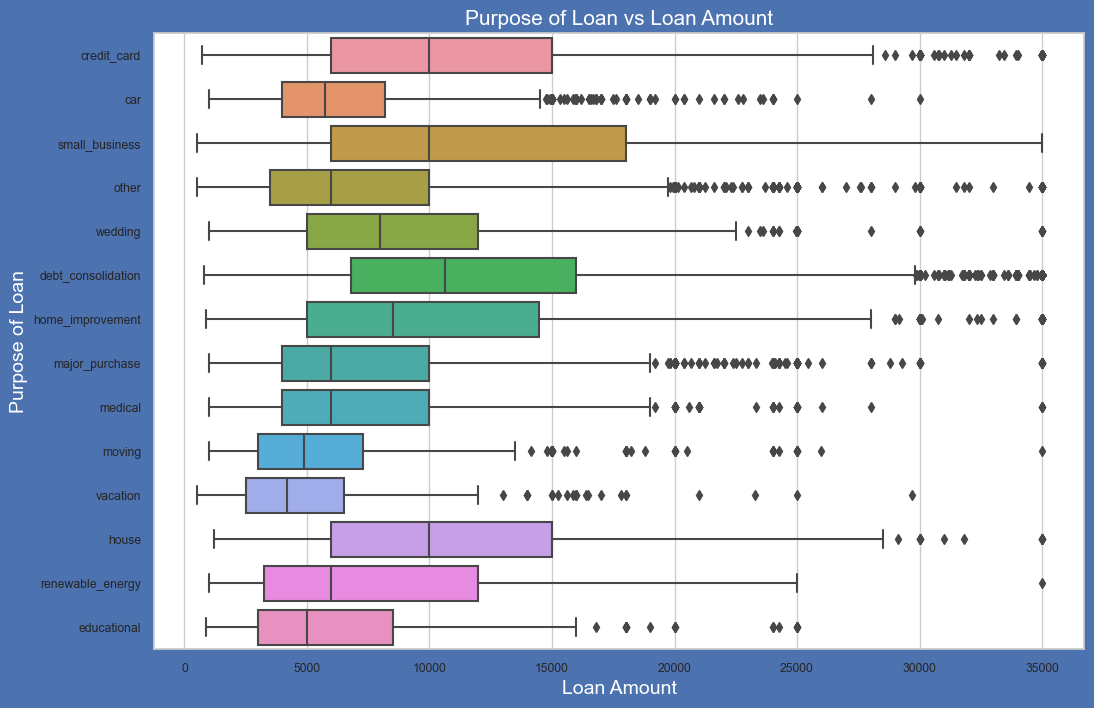

In [272]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Inference:
#The median, 75th percentile, and 95th percentile of loan amounts are the highest for loans taken for small business purposes 
#compared to all other purposes.
#Debt consolidation ranks second in terms of these loan amount percentiles.
#Loans for credit card payments come in third place for these percentiles.

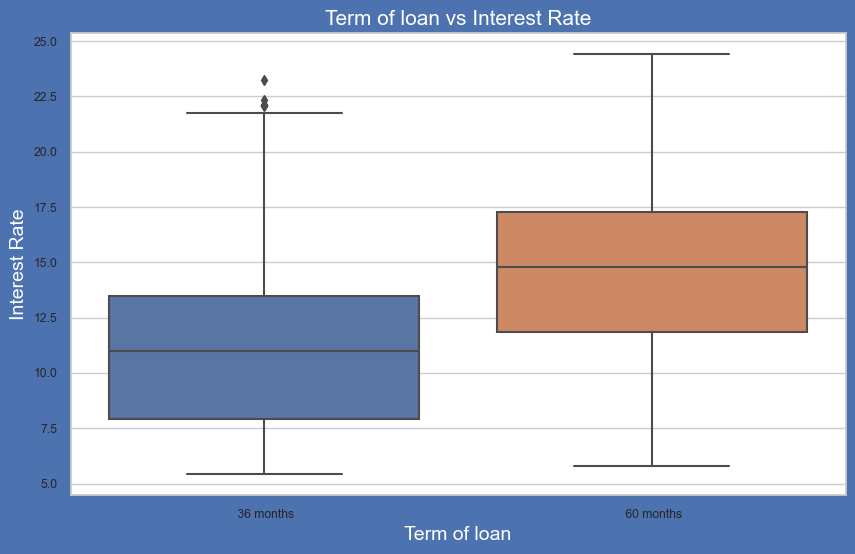

In [273]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loan)
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Inference:
#It is evident that the average interest rate is higher for loans with a 60-month term.
#Most loans issued for the longer term have higher interest rates for repayment.

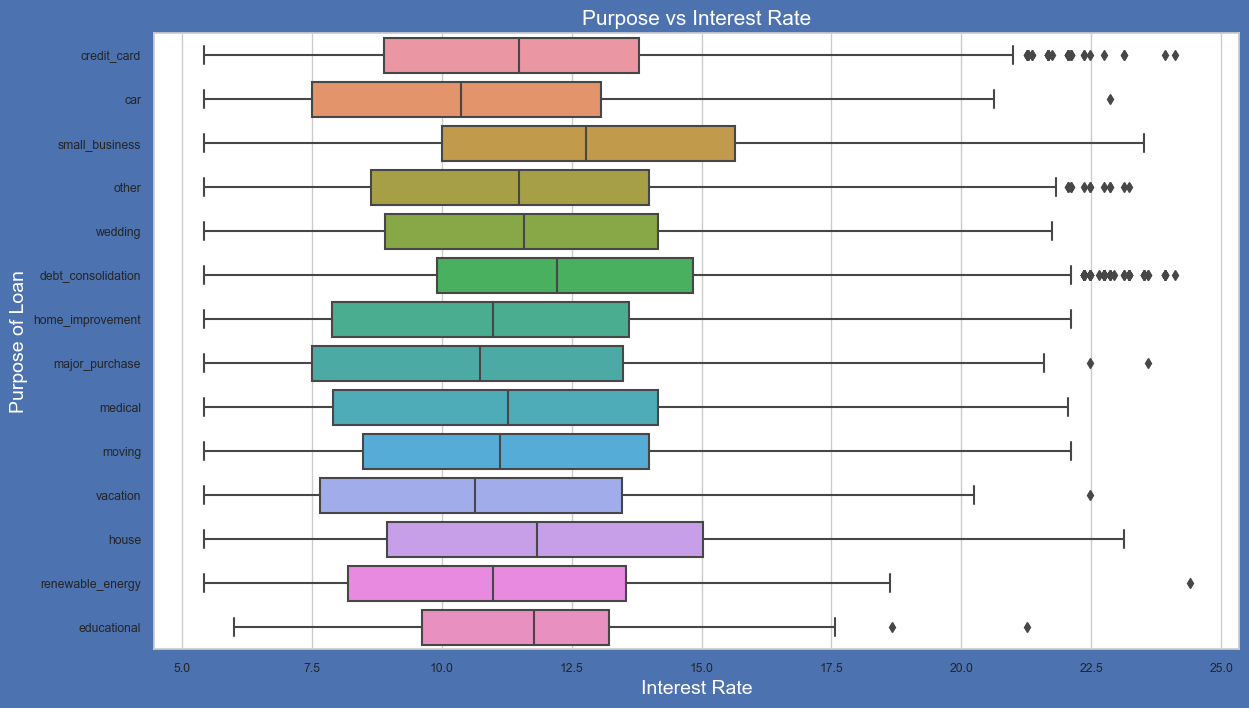

In [274]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan)
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Inference:
#The average interest rate is highest for loans taken for small business purposes.
#Borrowers taking loans for small business purposes face higher interest rates compared to other loan purposes.
#House loans come in second, with borrowers paying higher interest rates than those for other purposes.

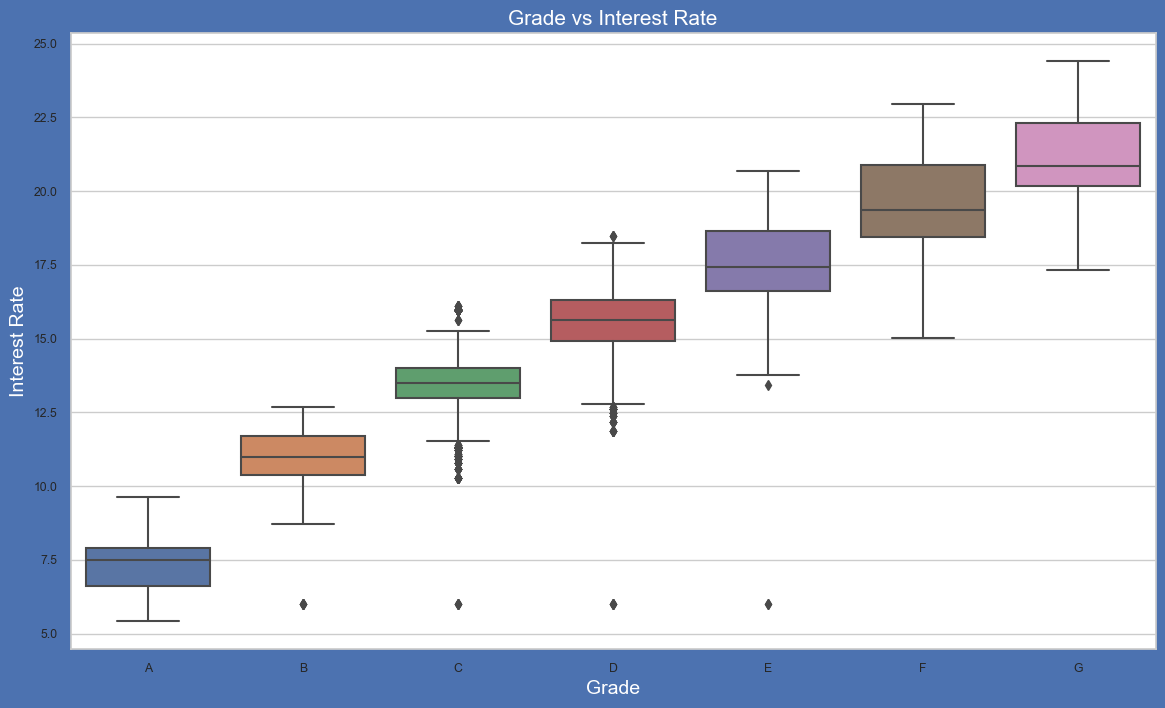

In [275]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =loan,order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

# Inference:
#A-grade represents the highest letter grade a lender can assign to a borrower.
#Generally, the higher the borrower's credit grade, the lower the interest rate offered on a loan.
#It is evident that interest rates increase progressively as grades move from A to F.

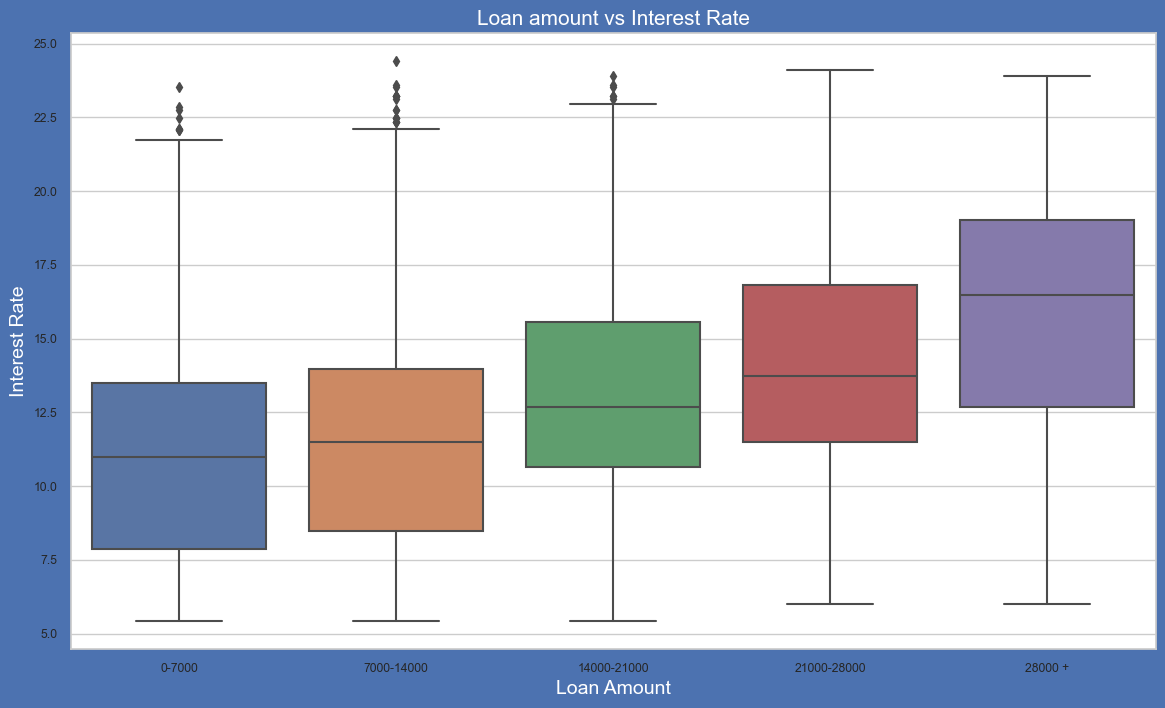

In [276]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_catagory', data =loan)
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Inference:
#It's apparent that interest rates tend to rise with increasing loan amounts.
#This trend may be attributed to the likelihood that larger loan amounts are often associated with longer loan terms, as we 
#observed earlier that longer loan terms generally entail higher interest rates.

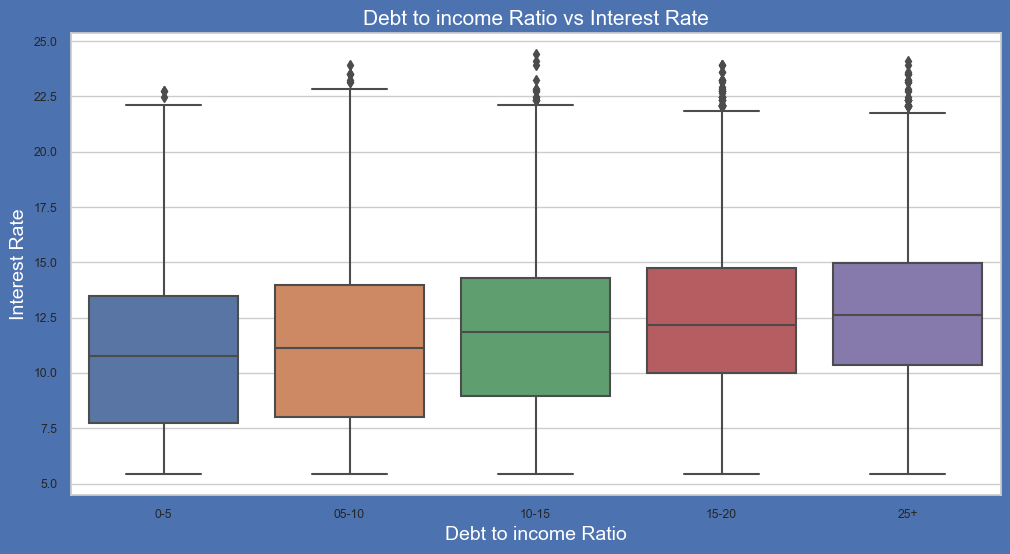

In [277]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(12,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_catagory', data =loan)
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Inference:
#If your Debt-to-Income (DTI) ratio is sufficiently low, you may qualify for a lower interest rate.
#Although the plot does not display significant variation, there is a slight upward trend in interest rates with 
#increasing DTI ratios.

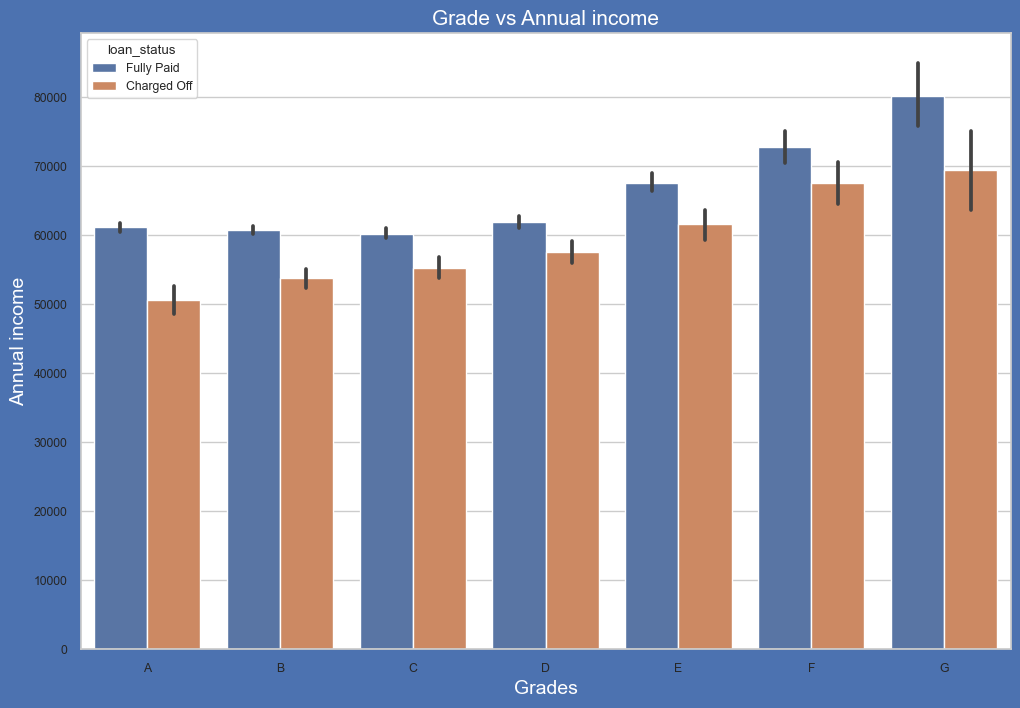

In [278]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(12, 8), facecolor='b')  
ax = sns.barplot(x='grade', y='annual_inc', hue='loan_status', data=loan, estimator=np.mean, order='ABCDEFG')
ax.set_title('Grade vs Annual income', fontsize=15, color='w')
ax.set_ylabel('Annual income', fontsize=14, color='w')
ax.set_xlabel('Grades', fontsize=14, color='w')
plt.show()

# Inference:
#From this analysis, it can be inferred that individuals who have been 'charged off' tend to have lower annual incomes compared 
#to those who have 'paid fully', regardless of their credit grade (i.e., within the same interest rate range).

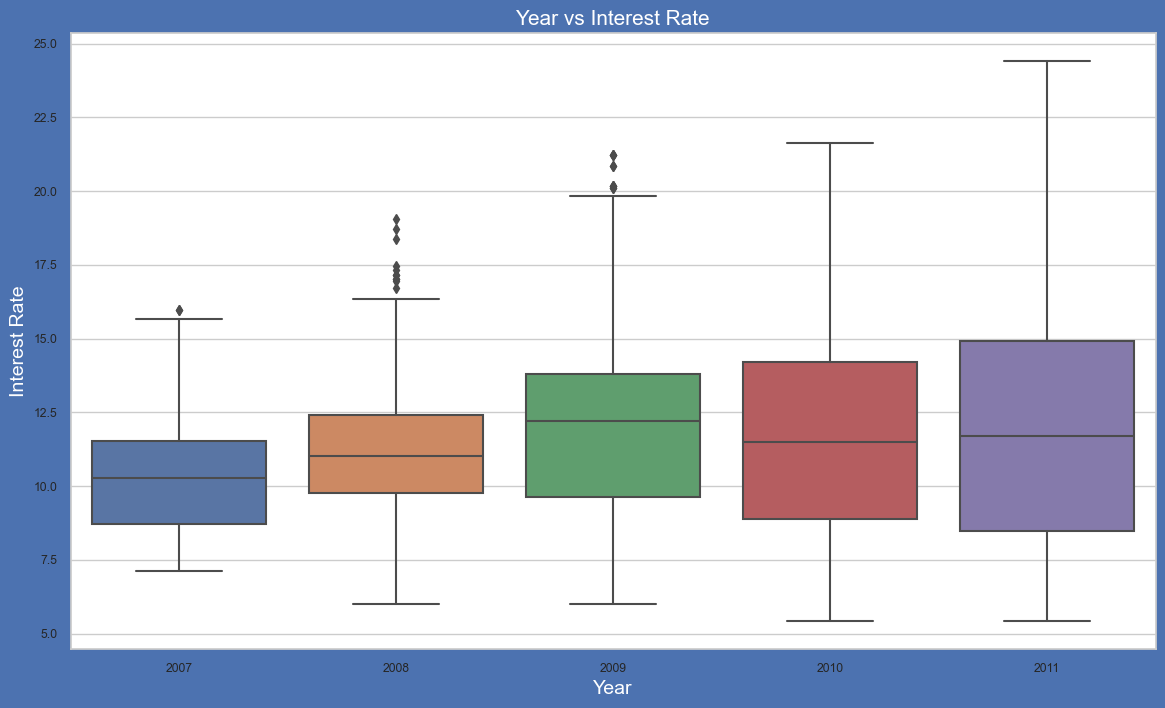

In [279]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loan)
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Inference:
# We observe intrest rate is increasing slowly with increase in year.

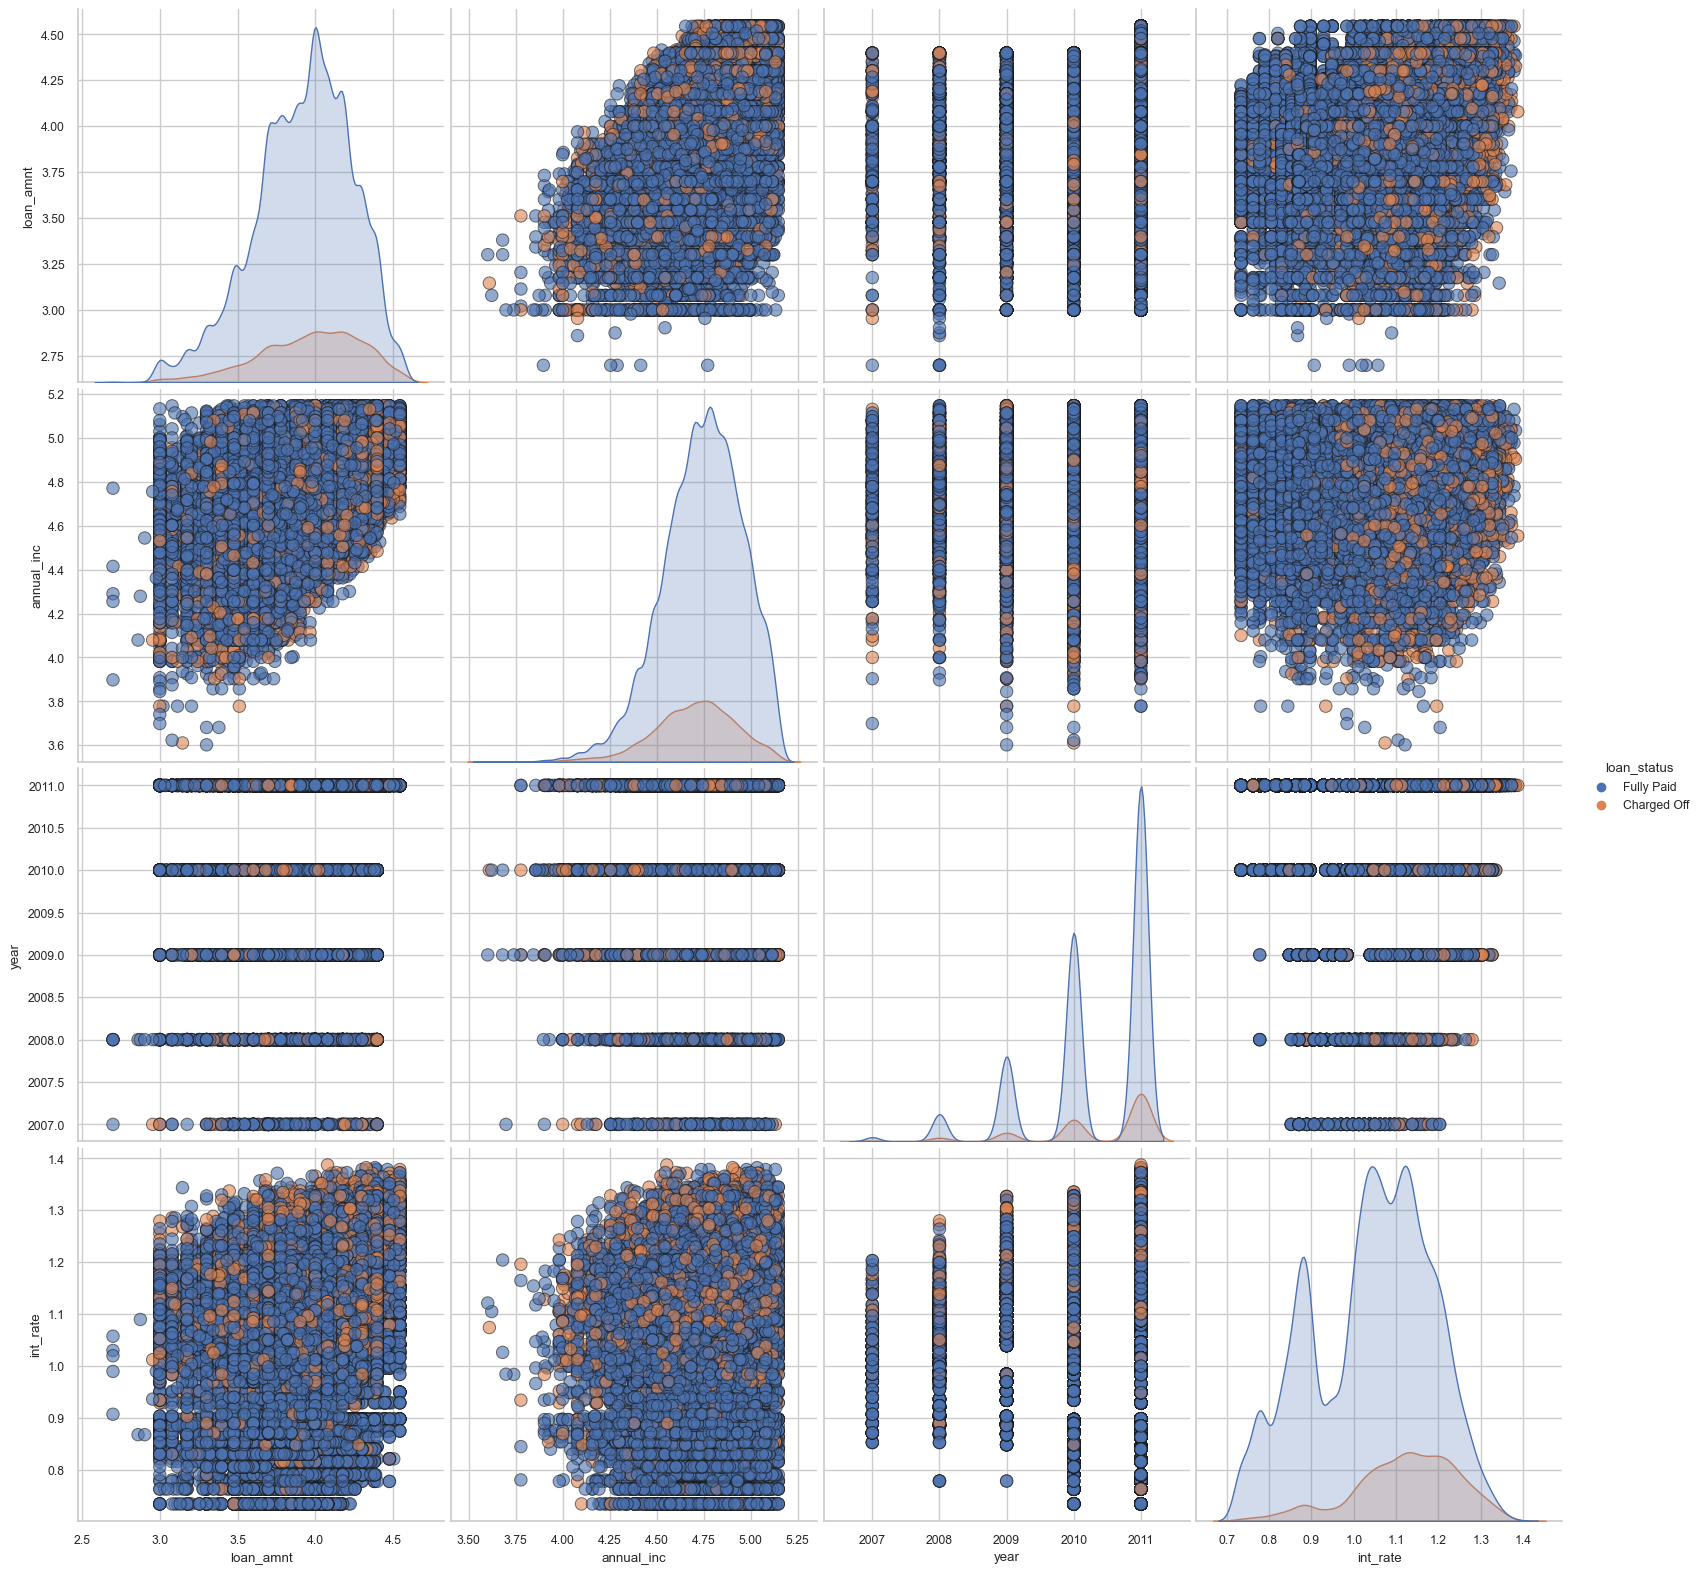

In [280]:
# Lets draw a pair plot for multivariate analysis

loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

#Inference
#There is a noticeable trend where higher interest rates correspond to a higher ratio of charged-off loans.
#As annual income increases, there is a slight rise in the loan amounts issued.
#The number of charged-off loans shows an upward trend over the years.
#An increase in loan amounts is generally associated with rising interest rates.

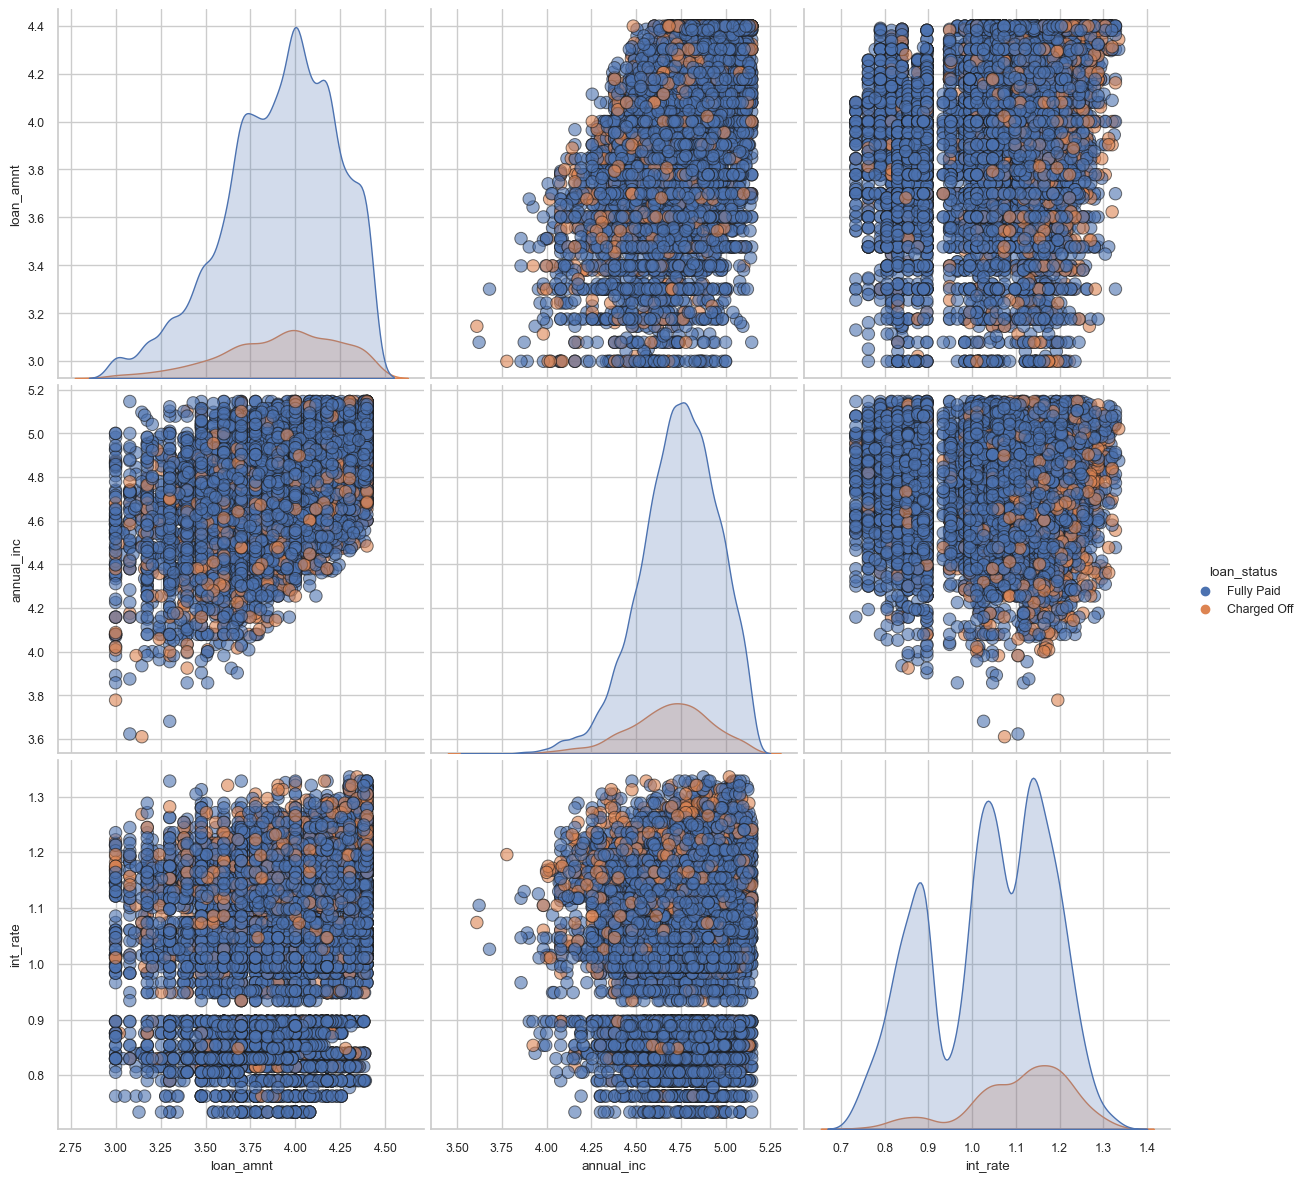

In [281]:
#Multivariate Analysis
#Pair plot using some columns from the dataset. 
#Given that the entire dataset may be too dense for effective visualization, we'll focus on data from the year 2010.

sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Infernece:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Interest rate is increasing with loan amount increase this results in high charged off.